<a href="https://colab.research.google.com/github/al-dayviid21/car_purchase_ml/blob/main/Car_purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Statements

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Read statements

In [2]:
df = pd.read_csv("car_data.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [52]:
gender_plt = df.Gender.value_counts(normalize=True)

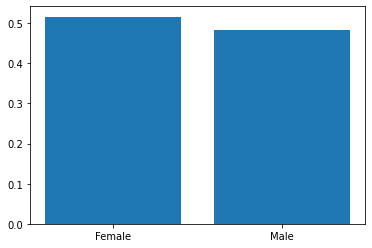

In [55]:
plt.bar(x=gender_plt.index, height=gender_plt.values);

In [14]:
df.rename(columns={'User ID':'User_id'}, inplace=True)

In [15]:
df1 = pd.get_dummies(df)
df1.head()

,User_id,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,385,35,20000,0,0,1
1,681,40,43500,0,0,1
2,353,49,74000,0,0,1
3,895,40,107500,1,0,1
4,661,25,79000,0,0,1


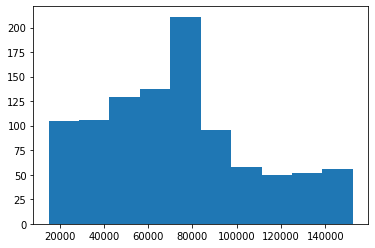

In [6]:
plt.hist(df1.AnnualSalary);

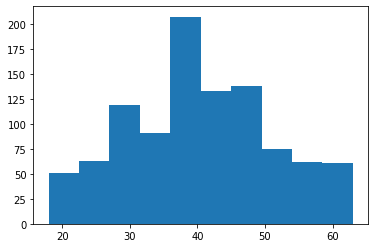

In [8]:
plt.hist(df1.Age);

Get labels and features

In [20]:
X = df1.drop(['Purchased', 'User_id'], axis=1)
y = df1['Purchased']

Test Train Validation Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1)

Train and Evaluate Data

Random Forest

In [26]:
# Fit and train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
# Print out classification report by making predictions using the training dataset
y_pred = clf.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       477
           1       0.99      1.00      1.00       333

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



In [29]:
# Print out classification report by making predictions using the validation dataset
y_pred_val = clf.predict(X_val)
print(classification_report(y_pred_val, y_val))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        62
           1       0.86      0.86      0.86        28

    accuracy                           0.91        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.91      0.91      0.91        90



Decision Tree Classifier

In [31]:
# Fit and train classifier
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [34]:
# Print out classification report by making predictions using the training dataset
y_pred = clf1.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       479
           1       0.99      1.00      1.00       331

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



In [35]:
# Print out classification report by making predictions using the validation dataset
y_pred_val = clf1.predict(X_val)
print(classification_report(y_pred_val, y_val))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.82      0.85      0.84        27

    accuracy                           0.90        90
   macro avg       0.88      0.89      0.88        90
weighted avg       0.90      0.90      0.90        90



Logistic Regression

In [37]:
# Fit and train classifier
clf2 = LogisticRegression(random_state=42)
clf2.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [46]:
# Print out classification report by making predictions using the training dataset
y_pred = clf2.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.39      0.46      0.42       404
           1       0.34      0.28      0.31       406

    accuracy                           0.37       810
   macro avg       0.37      0.37      0.37       810
weighted avg       0.37      0.37      0.37       810



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [41]:
# Print out classification report by making predictions using the validation dataset
y_pred_val = clf2.predict(X_val)
print(classification_report(y_pred_val, y_val))

[[62 28]
 [ 0  0]]


Preprocess Data and Train

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Random Forest

In [44]:
# Fit and train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Print out classification report by making predictions using the validation dataset
y_pred_val = clf.predict(X_val)
print(classification_report(y_pred_val, y_val))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93        61
           1       0.86      0.83      0.84        29

    accuracy                           0.90        90
   macro avg       0.89      0.88      0.88        90
weighted avg       0.90      0.90      0.90        90



Decision Tree Classifier

In [45]:
# Fit and train classifier
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X_train, y_train)

# Print out classification report by making predictions using the validation dataset
y_pred_val = clf1.predict(X_val)
print(classification_report(y_pred_val, y_val))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.82      0.85      0.84        27

    accuracy                           0.90        90
   macro avg       0.88      0.89      0.88        90
weighted avg       0.90      0.90      0.90        90



Logistic Regression

In [48]:
# Print out classification report by making predictions using the validation dataset
clf2 = LogisticRegression(random_state=42)
clf2.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [49]:
# Print out classification report by making predictions using the validation dataset
y_pred_val = clf2.predict(X_val)
print(classification_report(y_pred_val, y_val))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        64
           1       0.79      0.85      0.81        26

    accuracy                           0.89        90
   macro avg       0.86      0.88      0.87        90
weighted avg       0.89      0.89      0.89        90

